<a href="https://colab.research.google.com/github/anlianguzova/BI-stat-course-2022/blob/project_2/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import ttest_ind, mannwhitneyu
from sklearn.datasets import fetch_california_housing

In [ ]:
plt.rcParams["figure.figsize"] = 20, 15
plt.rcParams["font.size"] = 14

In [ ]:
path = 'data/BostonHousing.csv'
boston_data = pd.read_csv(path)

### EDA

In [ ]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
boston_data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
features = boston_data.iloc[:, 0:13]
target = boston_data['medv']

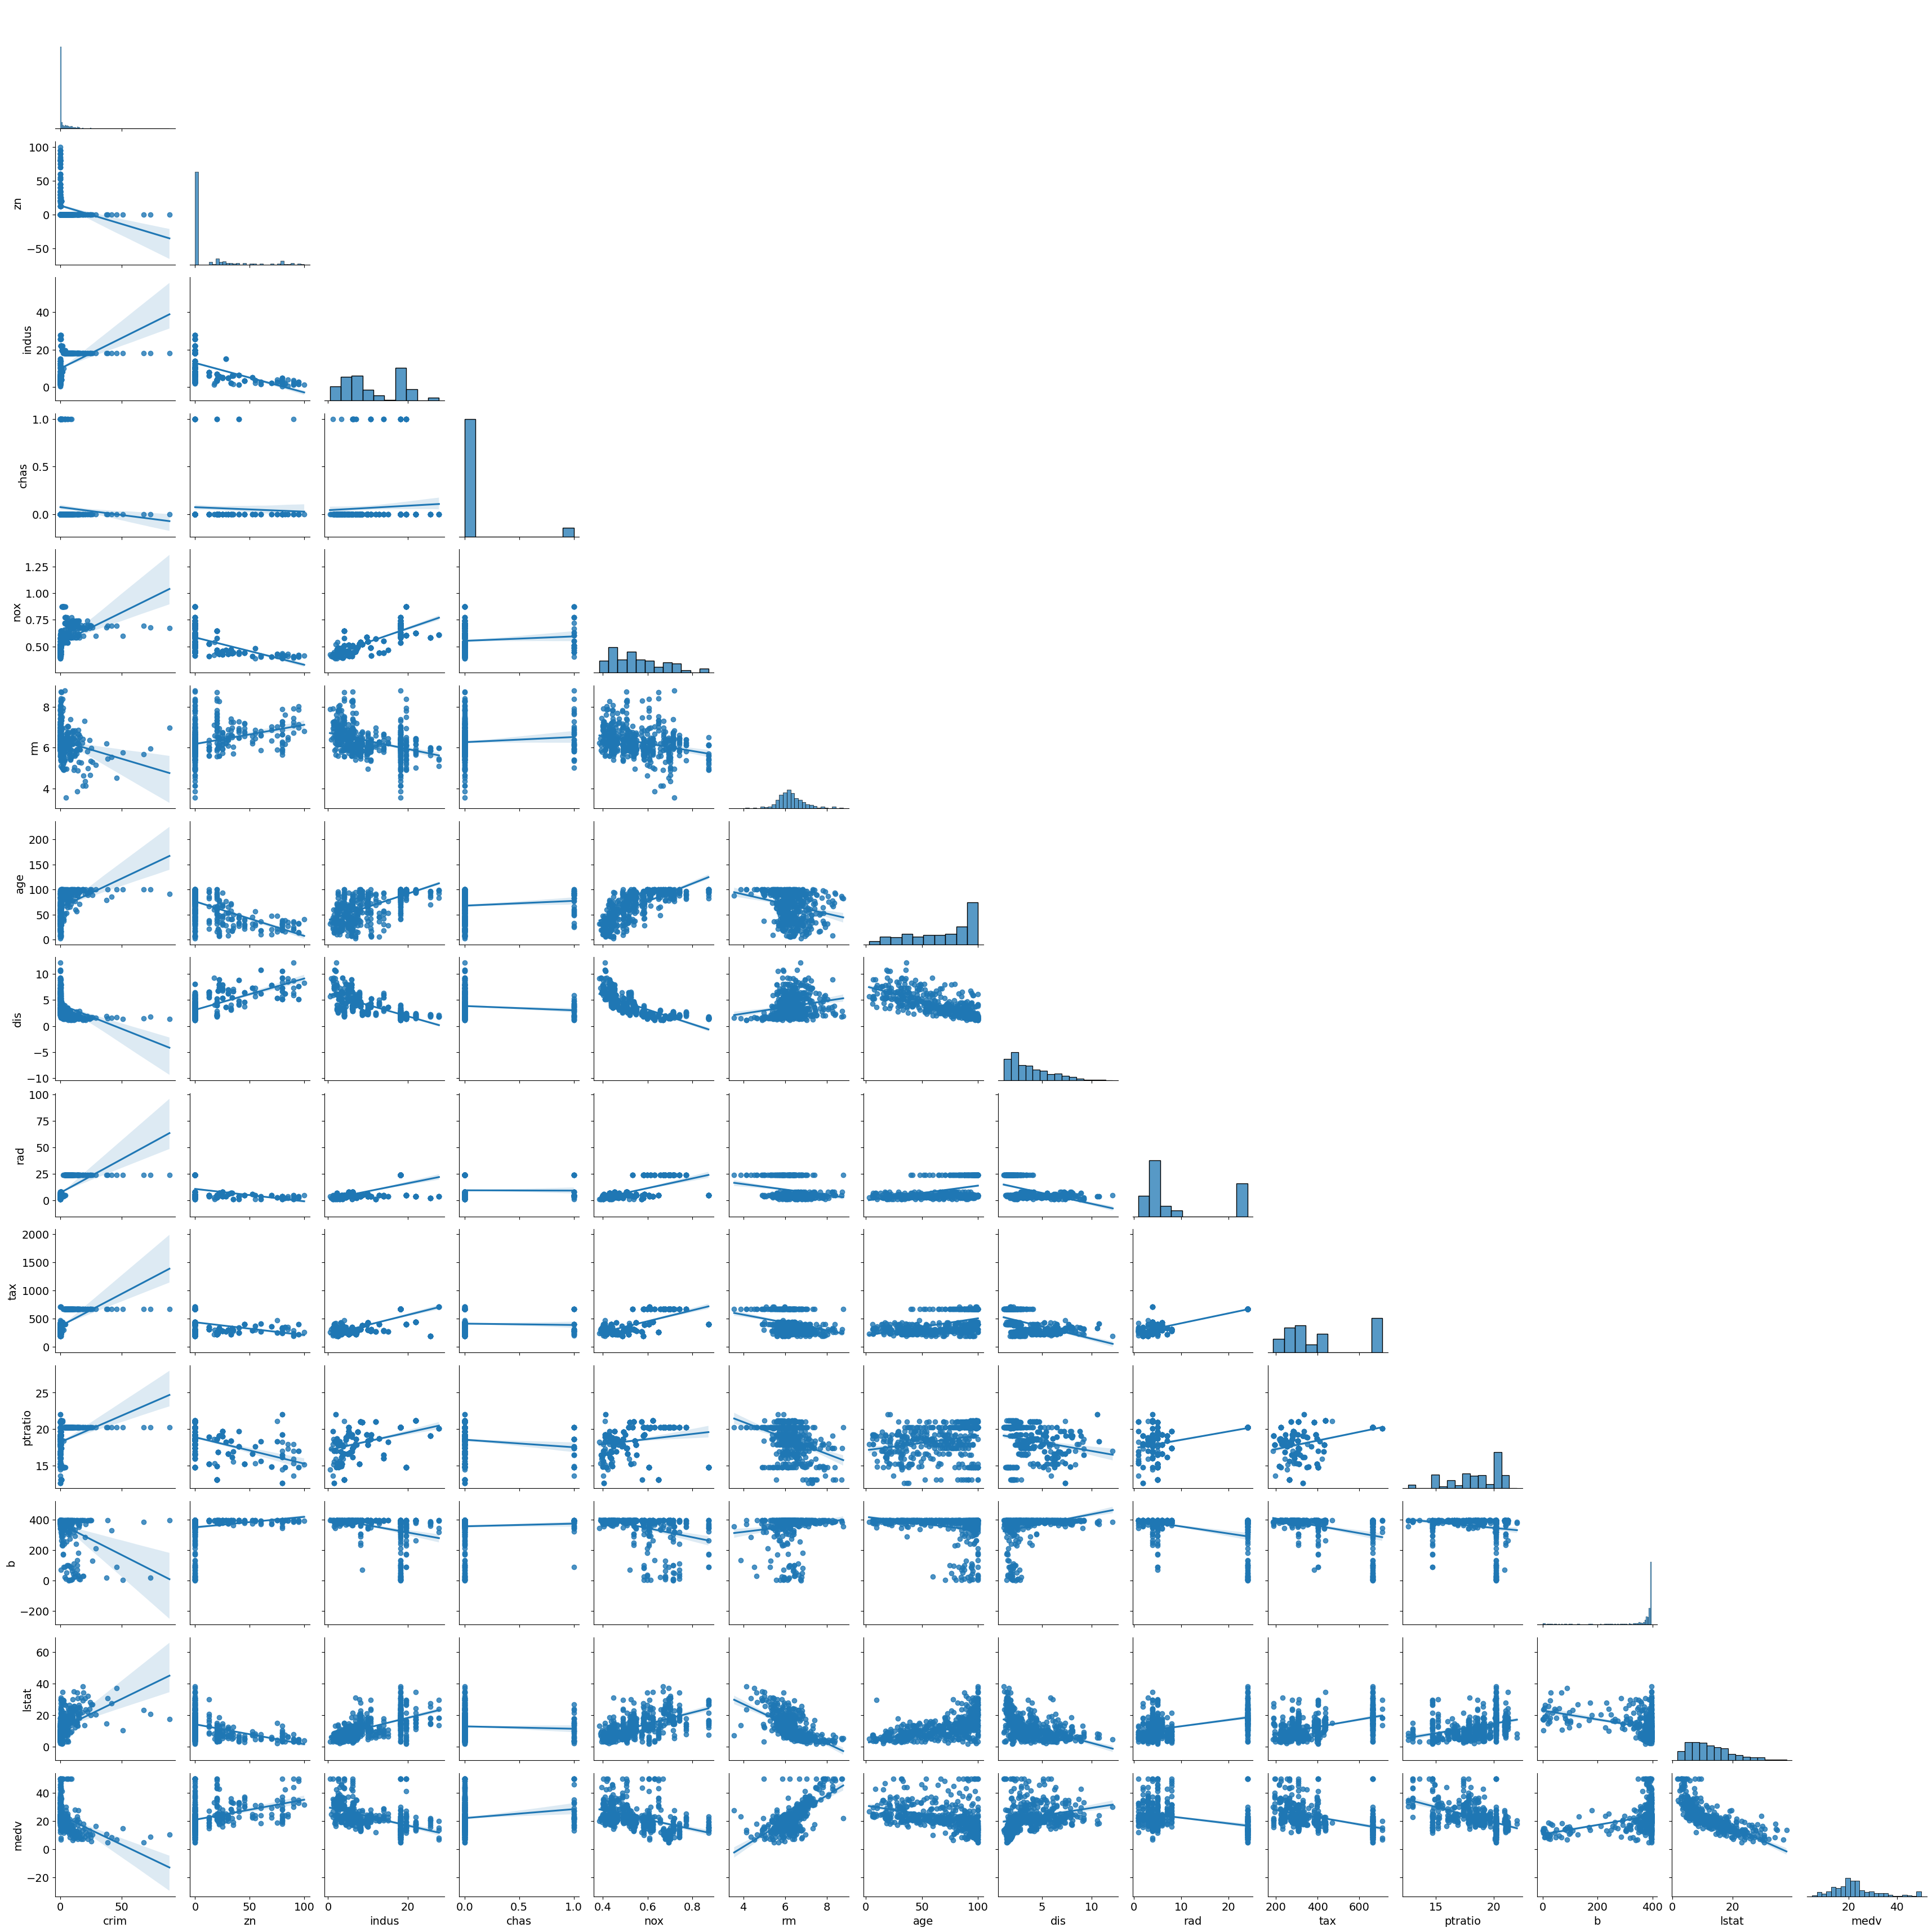

In [ ]:
sns.pairplot(pd.concat([features, target], axis=1), kind="reg", corner=True) # я там ниче не вижу, так что сохраню себе отдельно
plt.savefig('plot_eda')

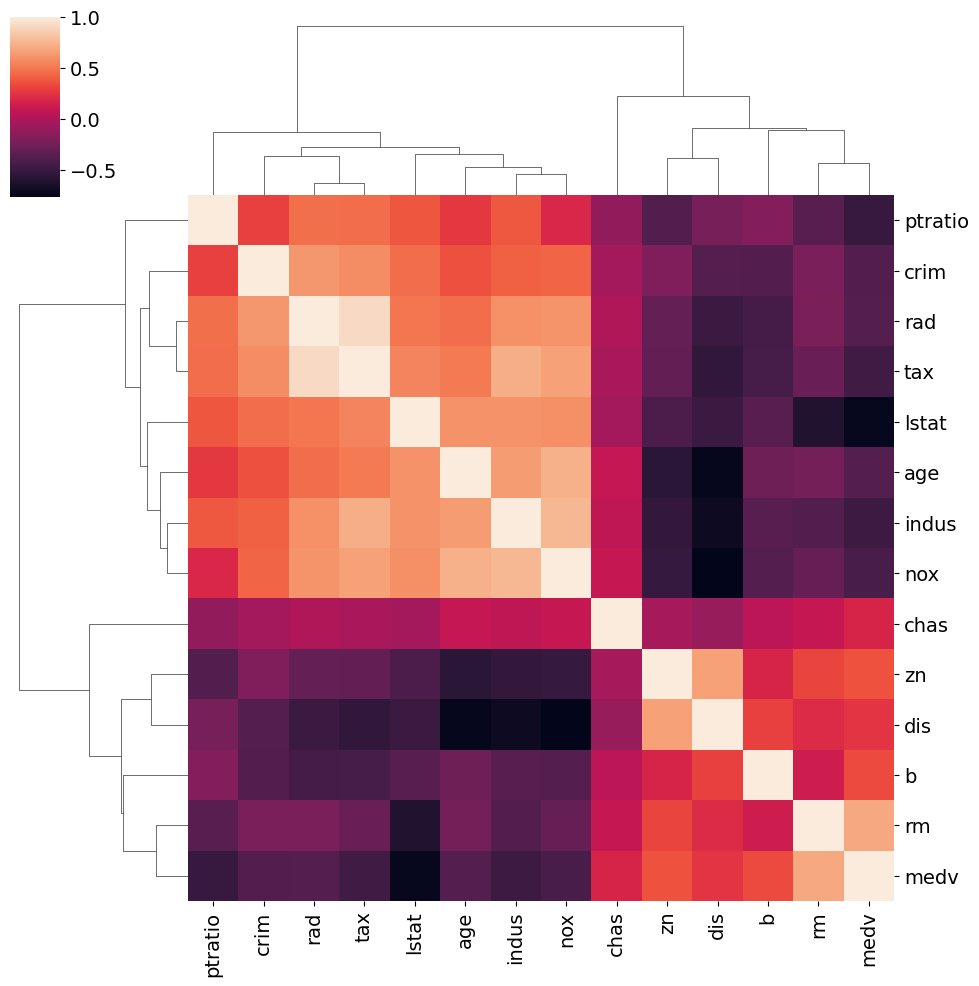

In [ ]:
sns.clustermap(pd.concat([features, target], axis=1).corr())

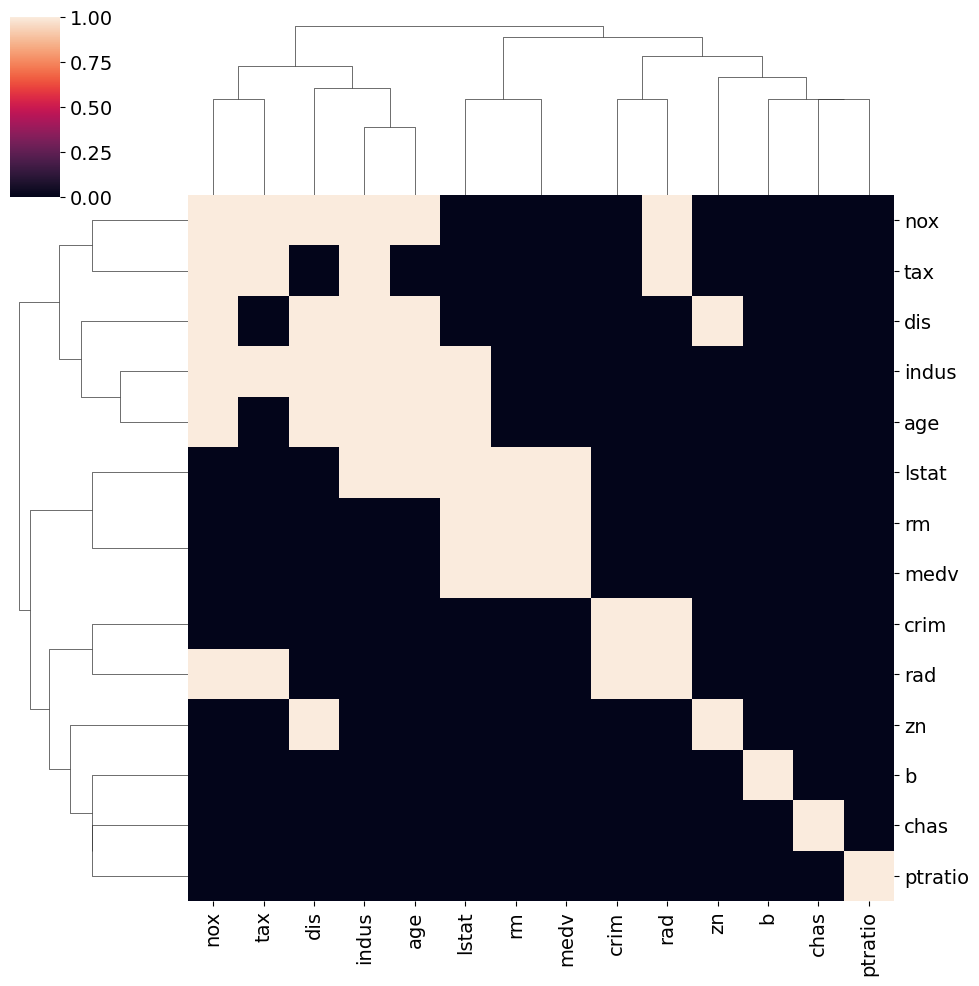

In [ ]:
sns.clustermap(pd.concat([features, target], axis=1).corr().abs() > 0.6)

In [ ]:
means = features.mean(axis=0)
stds = features.std(axis=0)

scaled_features = (features - means) / stds

scaled_features.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [ ]:
X = sm.add_constant(scaled_features)
model_scaled = sm.OLS(target, X)
results_scaled = model_scaled.fit()

print(results_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          6.72e-135
Time:                        17:24:48   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'const'),
  Text(1, 0, 'crim'),
  Text(2, 0, 'zn'),
  Text(3, 0, 'indus'),
  Text(4, 0, 'chas'),
  Text(5, 0, 'nox'),
  Text(6, 0, 'rm'),
  Text(7, 0, 'age'),
  Text(8, 0, 'dis'),
  Text(9, 0, 'rad'),
  Text(10, 0, 'tax'),
  Text(11, 0, 'ptratio'),
  Text(12, 0, 'b'),
  Text(13, 0, 'lstat')])

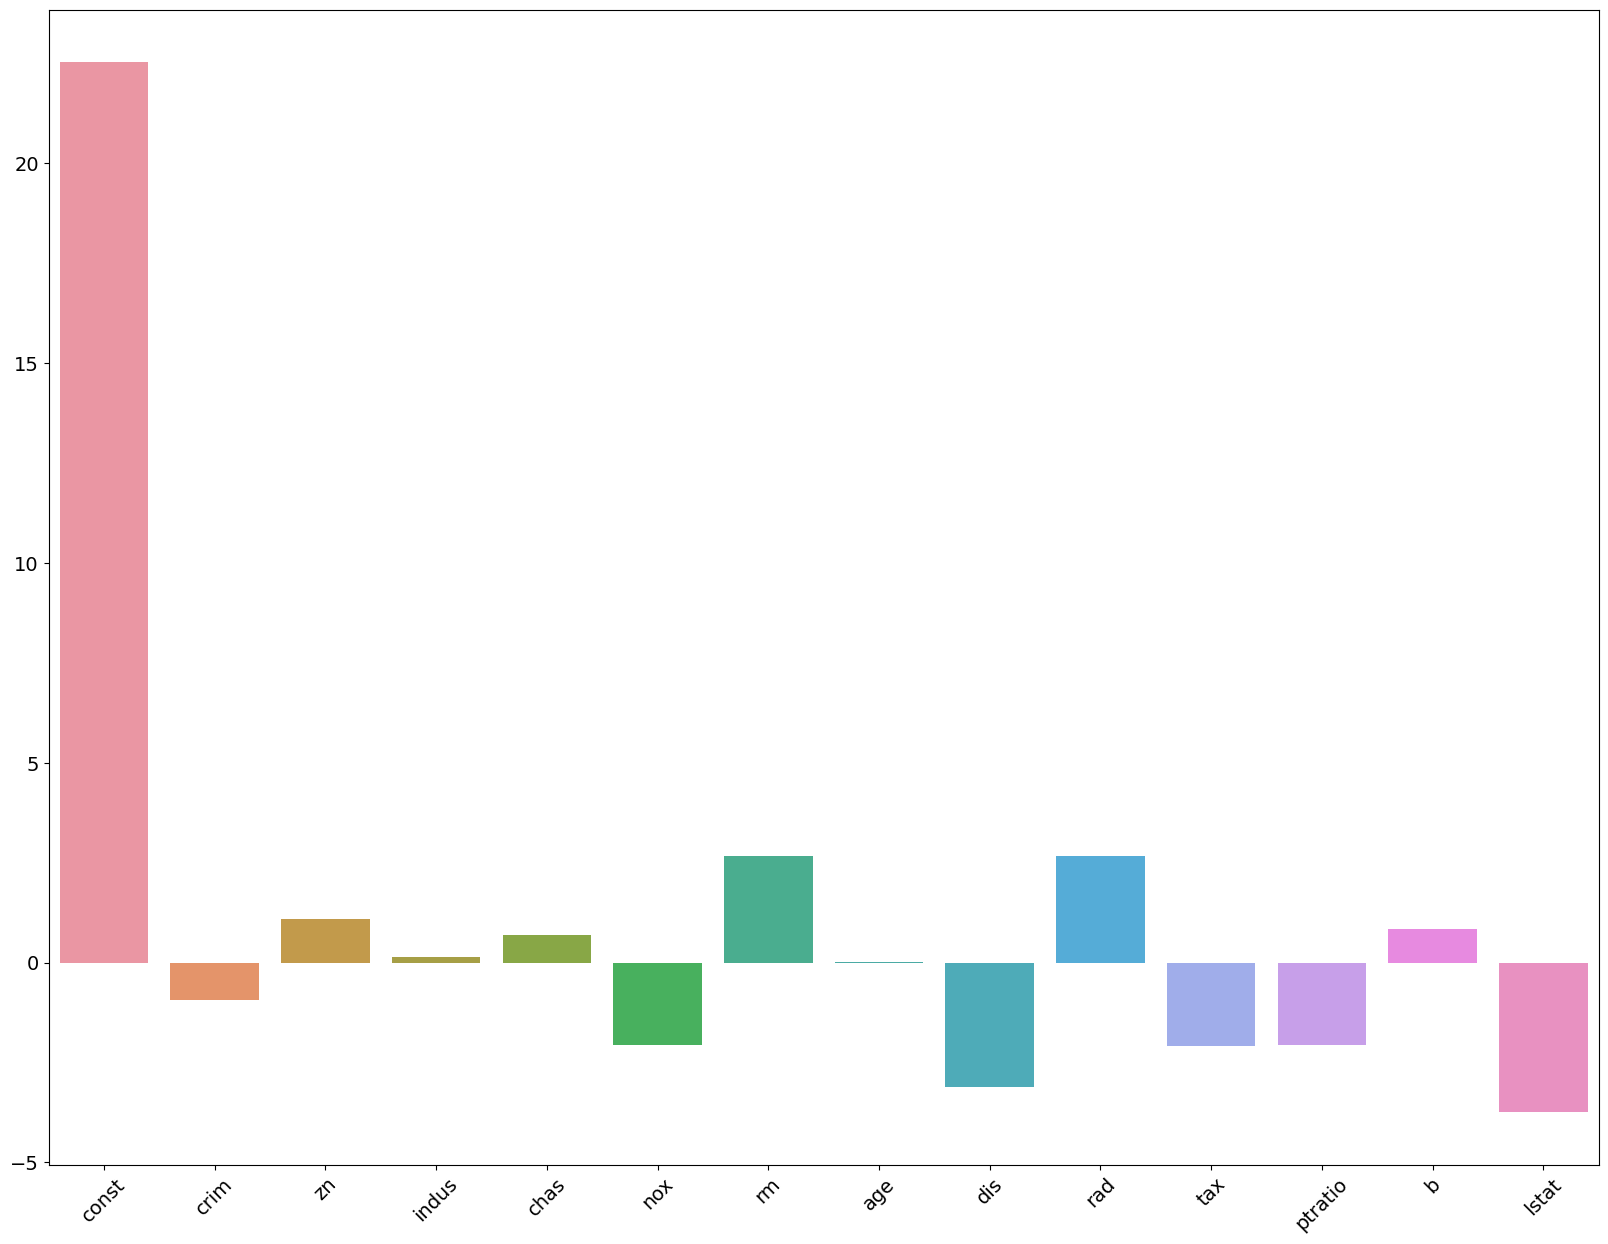

In [ ]:
sns.barplot(x=results_scaled.params.index, y=results_scaled.params)
plt.xticks(rotation=45)

In [ ]:
prediction_result = results_scaled.get_prediction(X)
target_pred = prediction_result.predicted_mean

Text(0, 0.5, 'Residual')

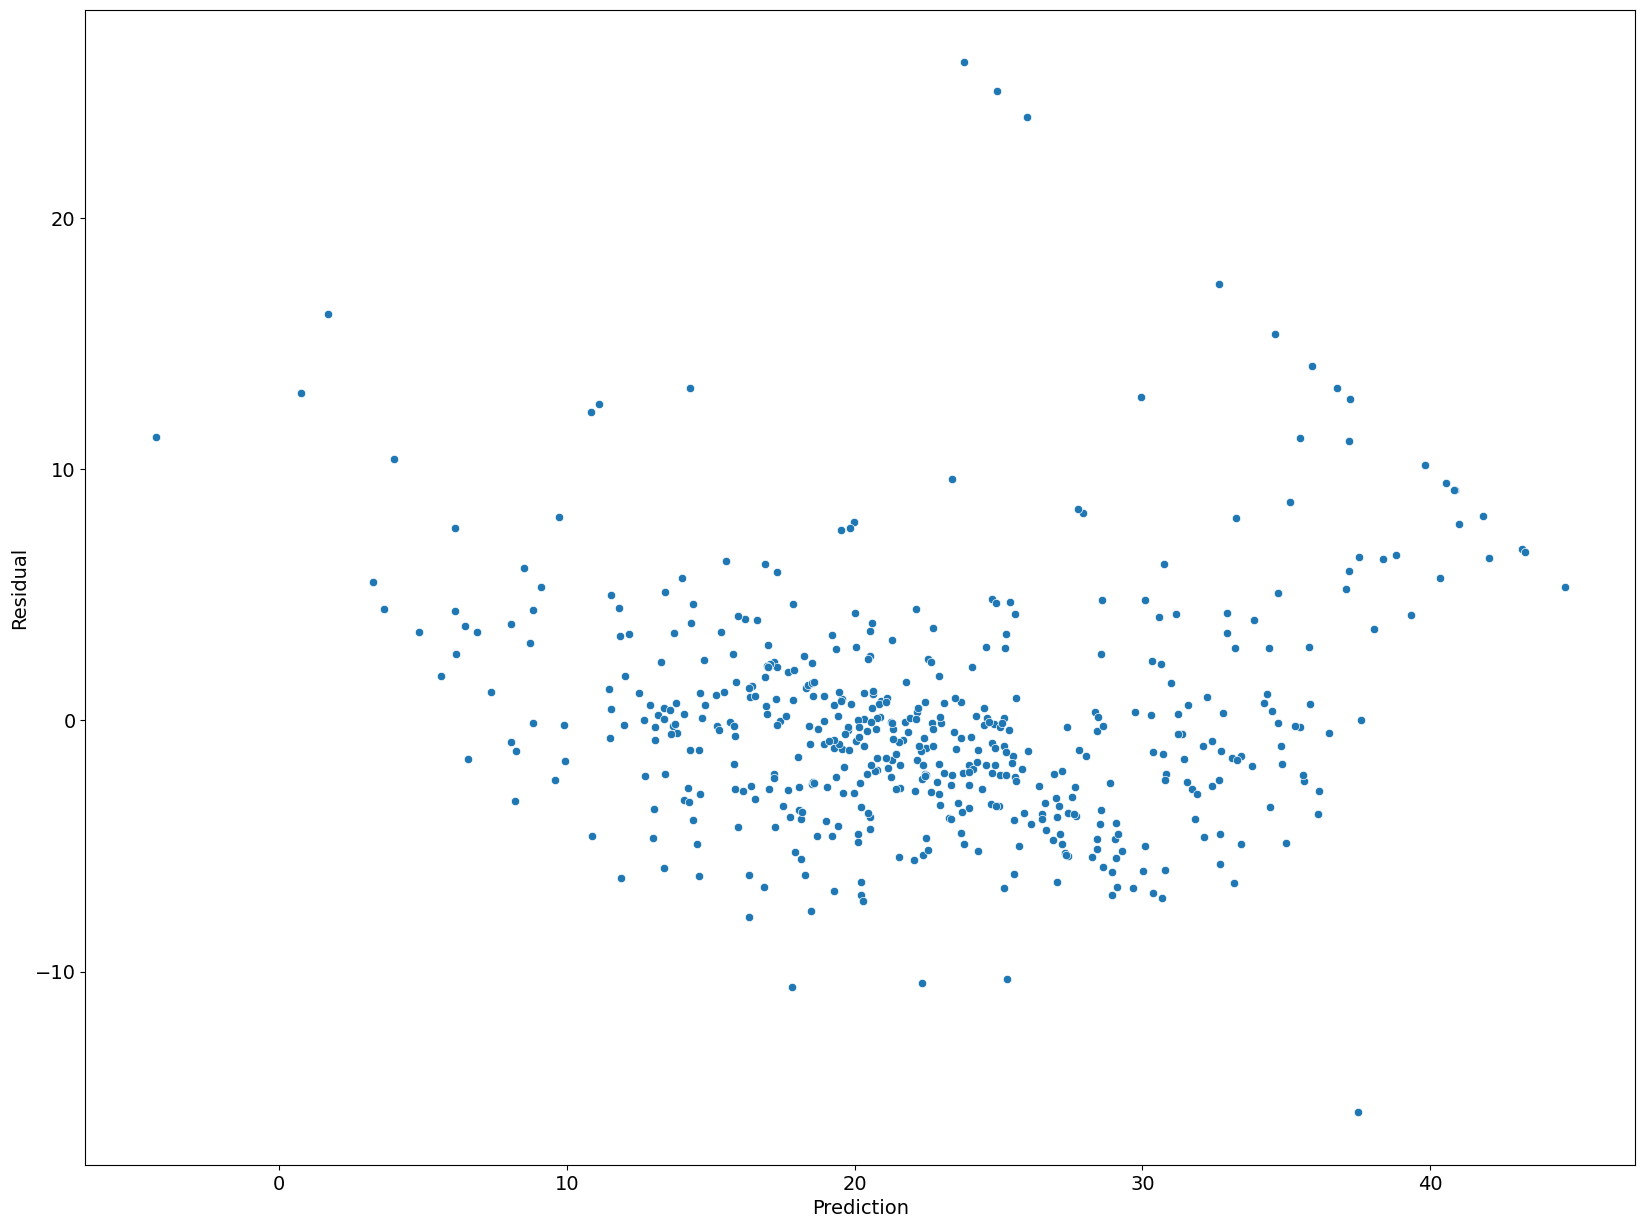

In [ ]:
resid_full = target - target_pred
sns.scatterplot(x=target_pred, y=resid_full)
plt.xlabel("Prediction")
plt.ylabel("Residual")

<AxesSubplot: xlabel='medv', ylabel='Count'>

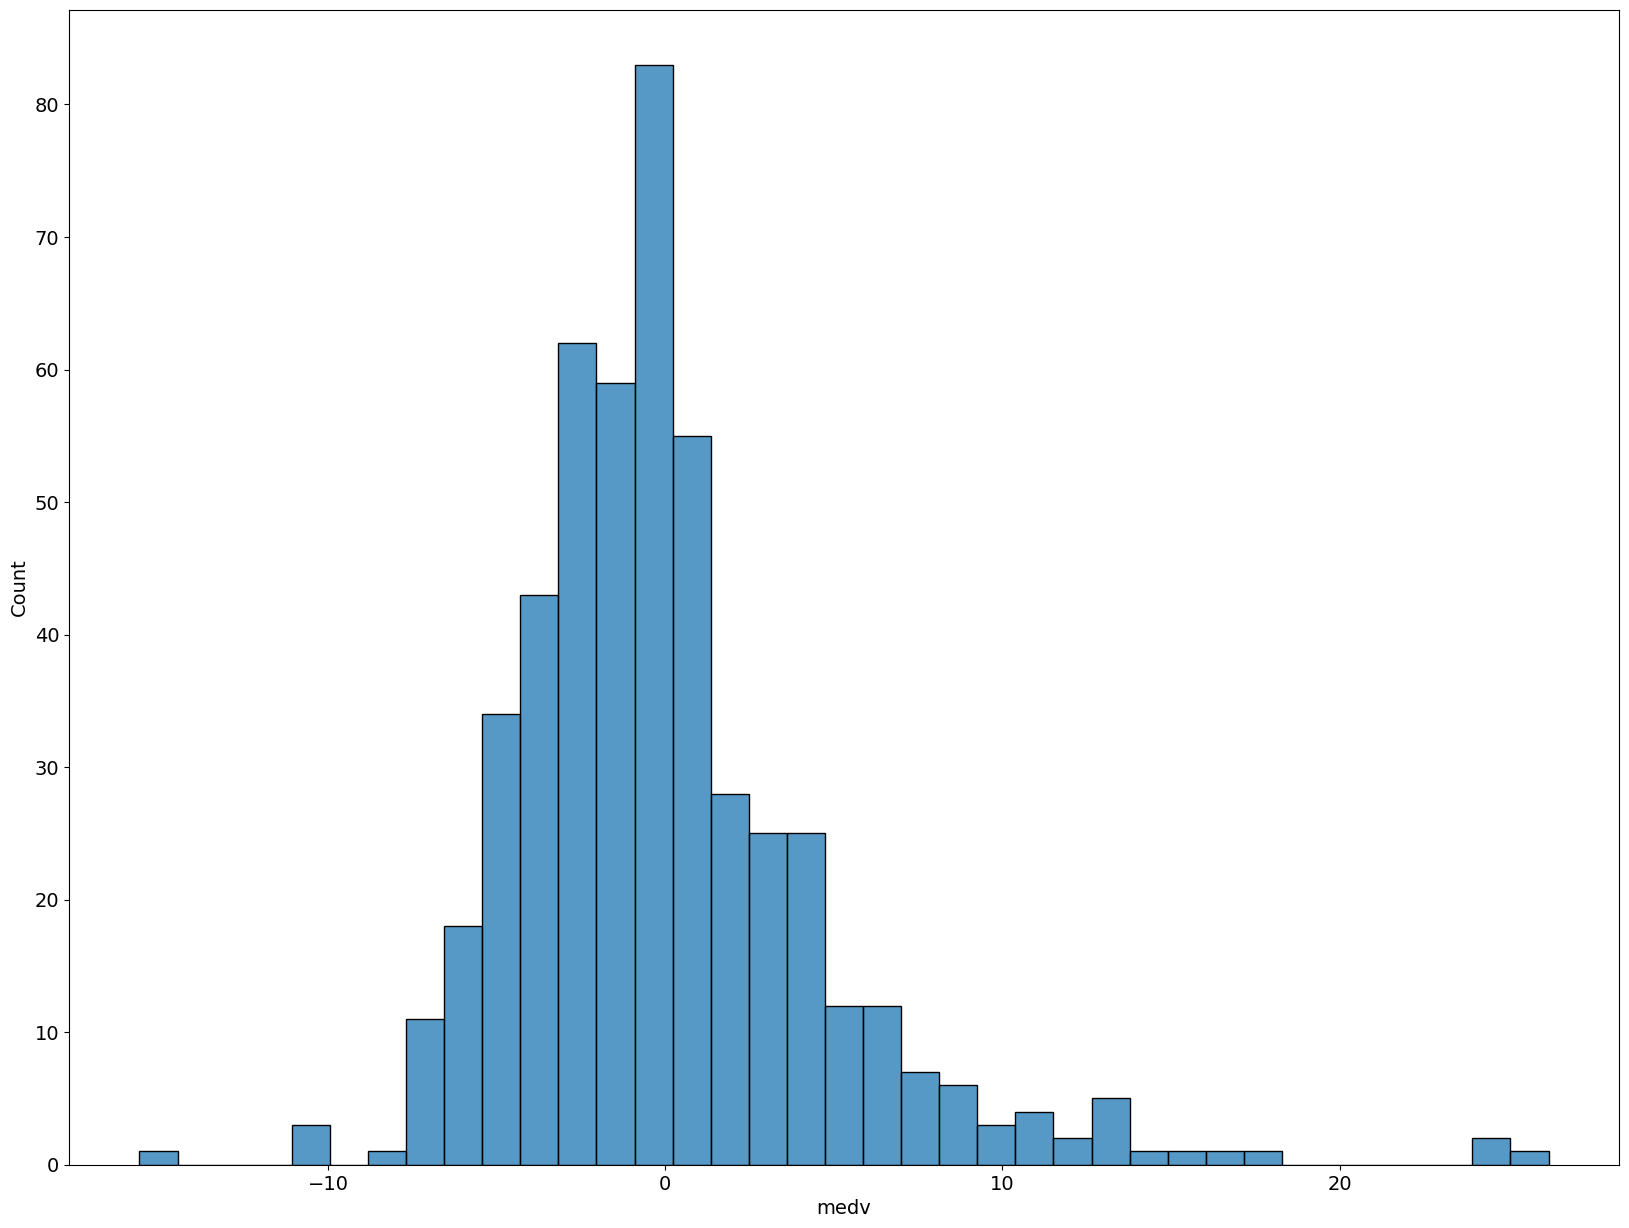

In [ ]:
sns.histplot(resid_full)

### Cook results

In [ ]:
influence = results_scaled.get_influence()
cooks = influence.cooks_distance
cooks

(array([2.00241182e-03, 4.22857395e-04, 6.55853503e-04, 1.18058057e-03,
        3.59851425e-03, 5.74194665e-04, 4.72546845e-07, 5.82635409e-03,
        4.62994000e-03, 4.01383186e-08, 1.92640255e-03, 5.67459552e-04,
        3.62408248e-05, 3.22586961e-05, 5.58811130e-05, 1.65626094e-05,
        4.91207261e-04, 1.32490825e-05, 1.27398506e-03, 1.69581259e-06,
        6.97222384e-05, 1.60947828e-04, 2.07796361e-05, 2.90688609e-05,
        3.11014124e-07, 1.38389141e-05, 6.48388494e-05, 4.41362303e-07,
        7.33485688e-05, 7.62795999e-07, 9.89547175e-05, 7.46407072e-04,
        2.28054439e-03, 7.20316848e-05, 3.22115187e-06, 7.68854322e-04,
        1.71832946e-04, 1.67793317e-04, 1.60591201e-04, 3.26965825e-05,
        5.21299660e-05, 1.81626540e-04, 7.02029486e-07, 6.26114010e-07,
        1.07290360e-04, 3.36163087e-04, 8.50425200e-06, 1.50051230e-04,
        4.98762064e-03, 2.55758721e-04, 1.04455561e-04, 6.00527884e-04,
        2.93524386e-04, 1.88430383e-05, 2.23822707e-03, 2.205784

In [ ]:
(cooks[1] < 0.05).sum()

0

In [ ]:
X = X[cooks[1] >= 0.05]
target = target[cooks[1] >= 0.05]

In [ ]:
model_scaled = sm.OLS(target, X)
results_scaled = model_scaled.fit()

print(results_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          6.72e-135
Time:                        17:32:41   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]

    return vif_data

In [ ]:
calculate_vif(X)

,feature,VIF
0,const,1.000000
1,crim,1.792192
2,zn,2.298758
3,indus,3.991596
4,chas,1.073995
5,nox,4.393720
6,rm,1.933744
7,age,3.100826
8,dis,3.955945
9,rad,7.484496


In [ ]:
model_updated = sm.OLS(target, X.drop(columns=['rad']))
results_updated = model_updated.fit()

print(results_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     110.8
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          1.92e-131
Time:                        17:34:59   Log-Likelihood:                -1509.5
No. Observations:                 506   AIC:                             3045.
Df Residuals:                     493   BIC:                             3100.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.215    104.682      0.0

In [ ]:
calculate_vif(X.drop(columns=['rad', 'nox', 'dis', 'indus', 'lstat', 'tax']))

,feature,VIF
0,const,1.000000
1,crim,1.342583
2,zn,1.680416
3,chas,1.043732
4,rm,1.216701
5,age,1.668190
6,ptratio,1.345528
7,b,1.209887


In [ ]:
model_final = sm.OLS(target, X.drop(columns=['rad', 'nox', 'dis', 'indus', 'lstat', 'tax']))
results_final = model_final.fit()

In [ ]:
preds_full = results_scaled.get_prediction(X).predicted_mean
preds_final = results_final.get_prediction(X.drop(columns=['rad', 'nox', 'dis', 'indus', 'lstat', 'tax'])).predicted_mean


In [ ]:
errors_full = target - preds_full
errors_updated = target - preds_final

<AxesSubplot: xlabel='medv', ylabel='Count'>

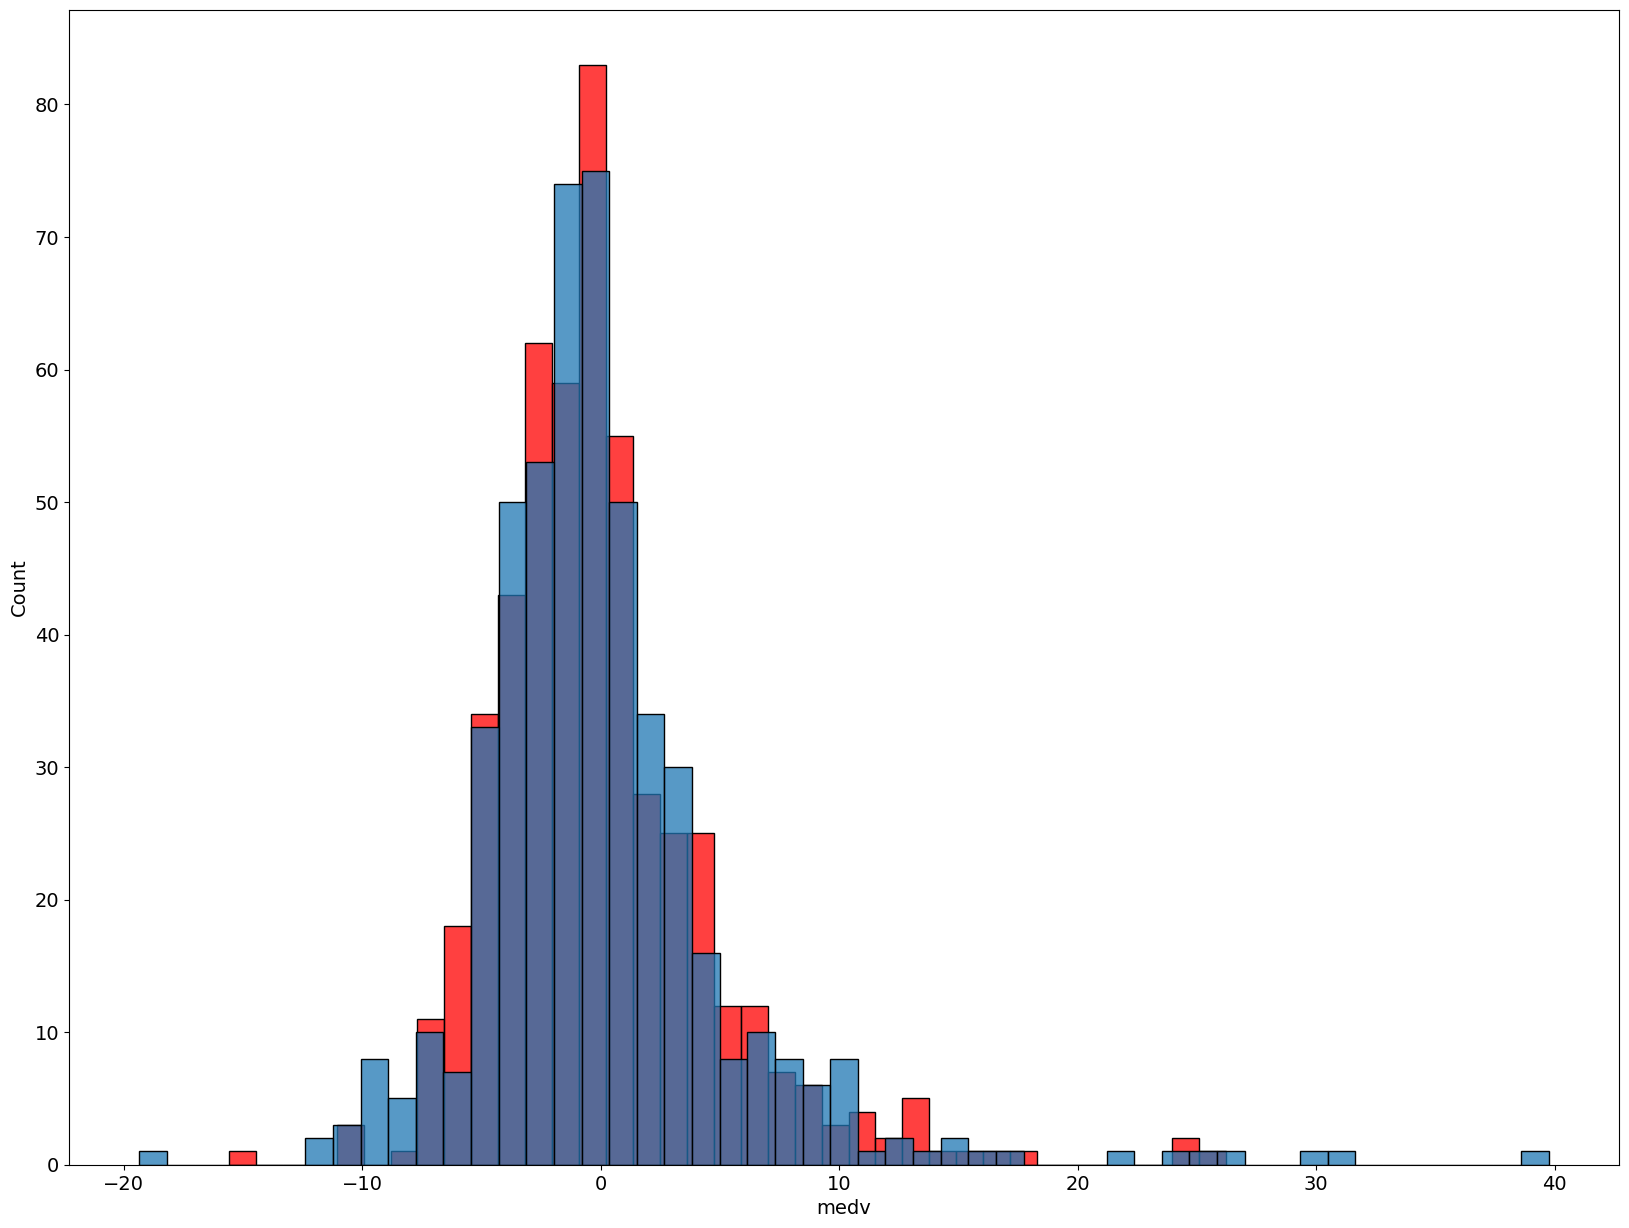

In [ ]:
sns.histplot(errors_full, color="red")
sns.histplot(errors_updated)

<AxesSubplot: xlabel='medv', ylabel='Count'>

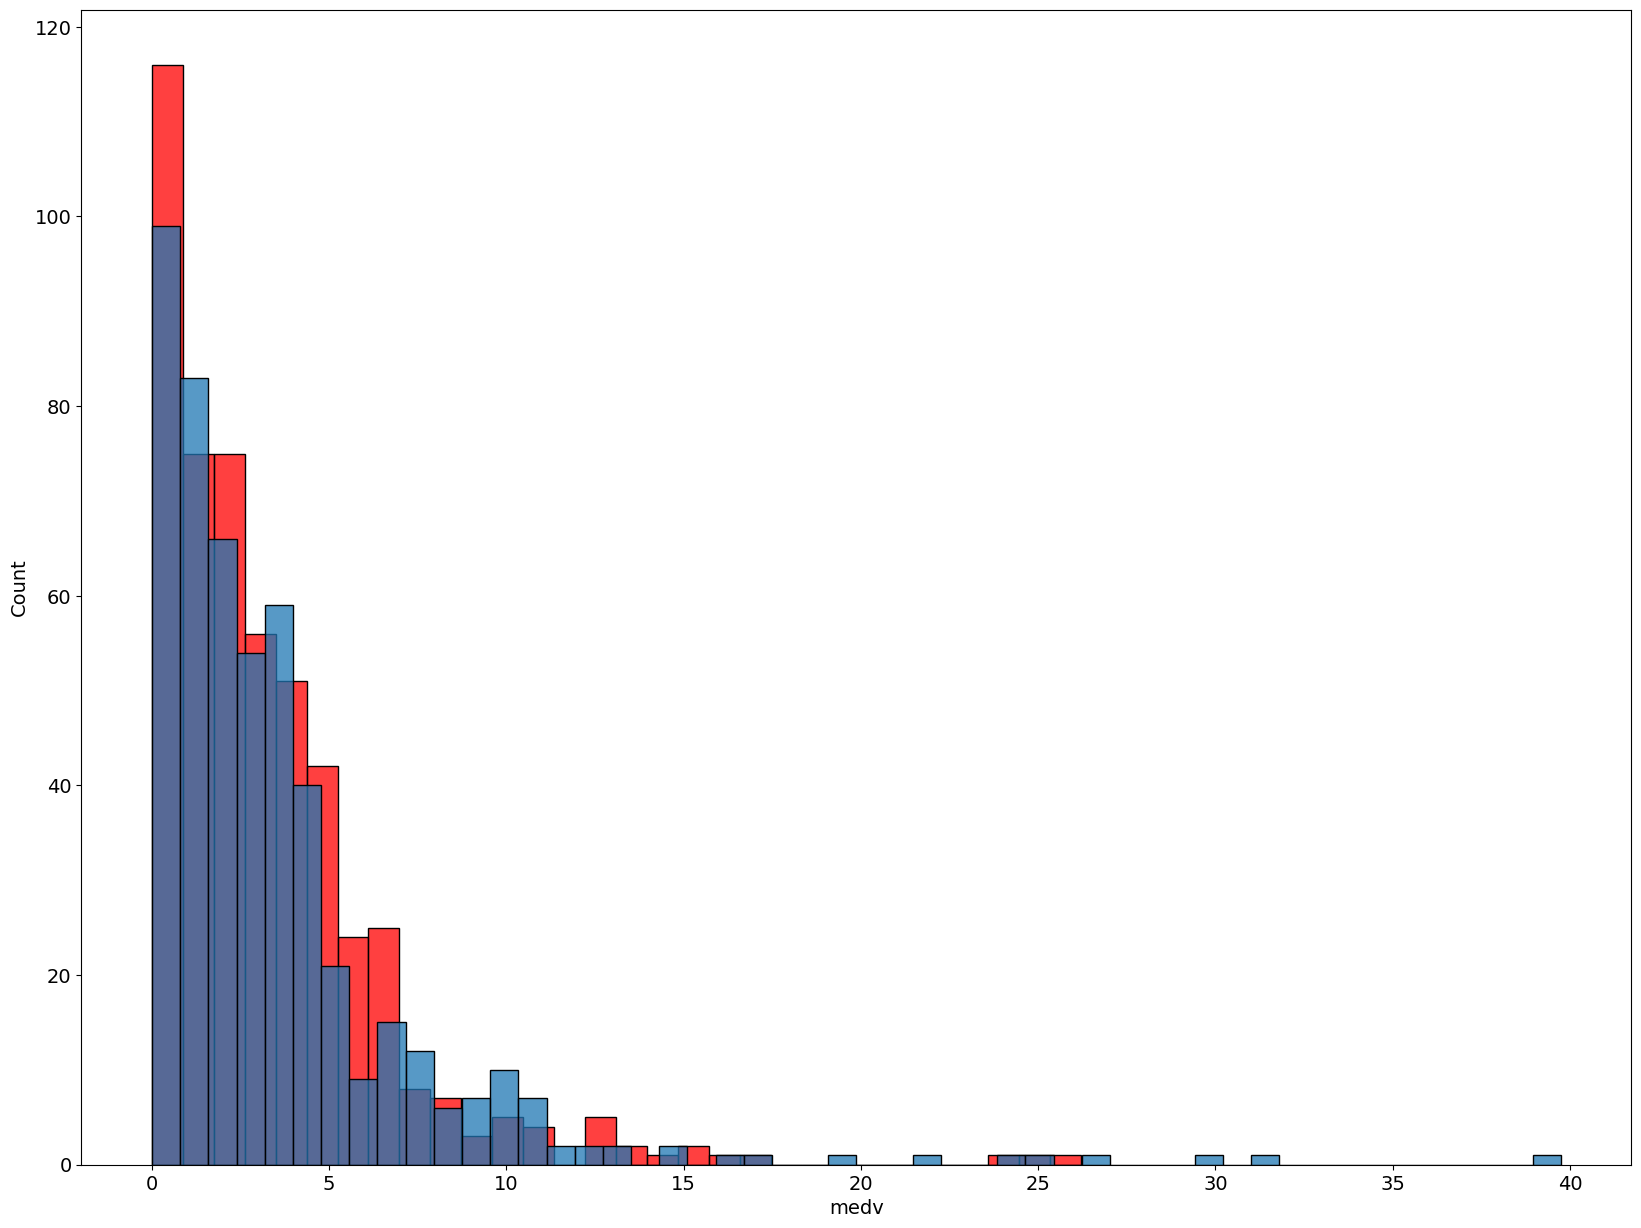

In [ ]:
sns.histplot(errors_full.abs(), color="red")
sns.histplot(errors_updated.abs())

<AxesSubplot: xlabel='medv', ylabel='Count'>

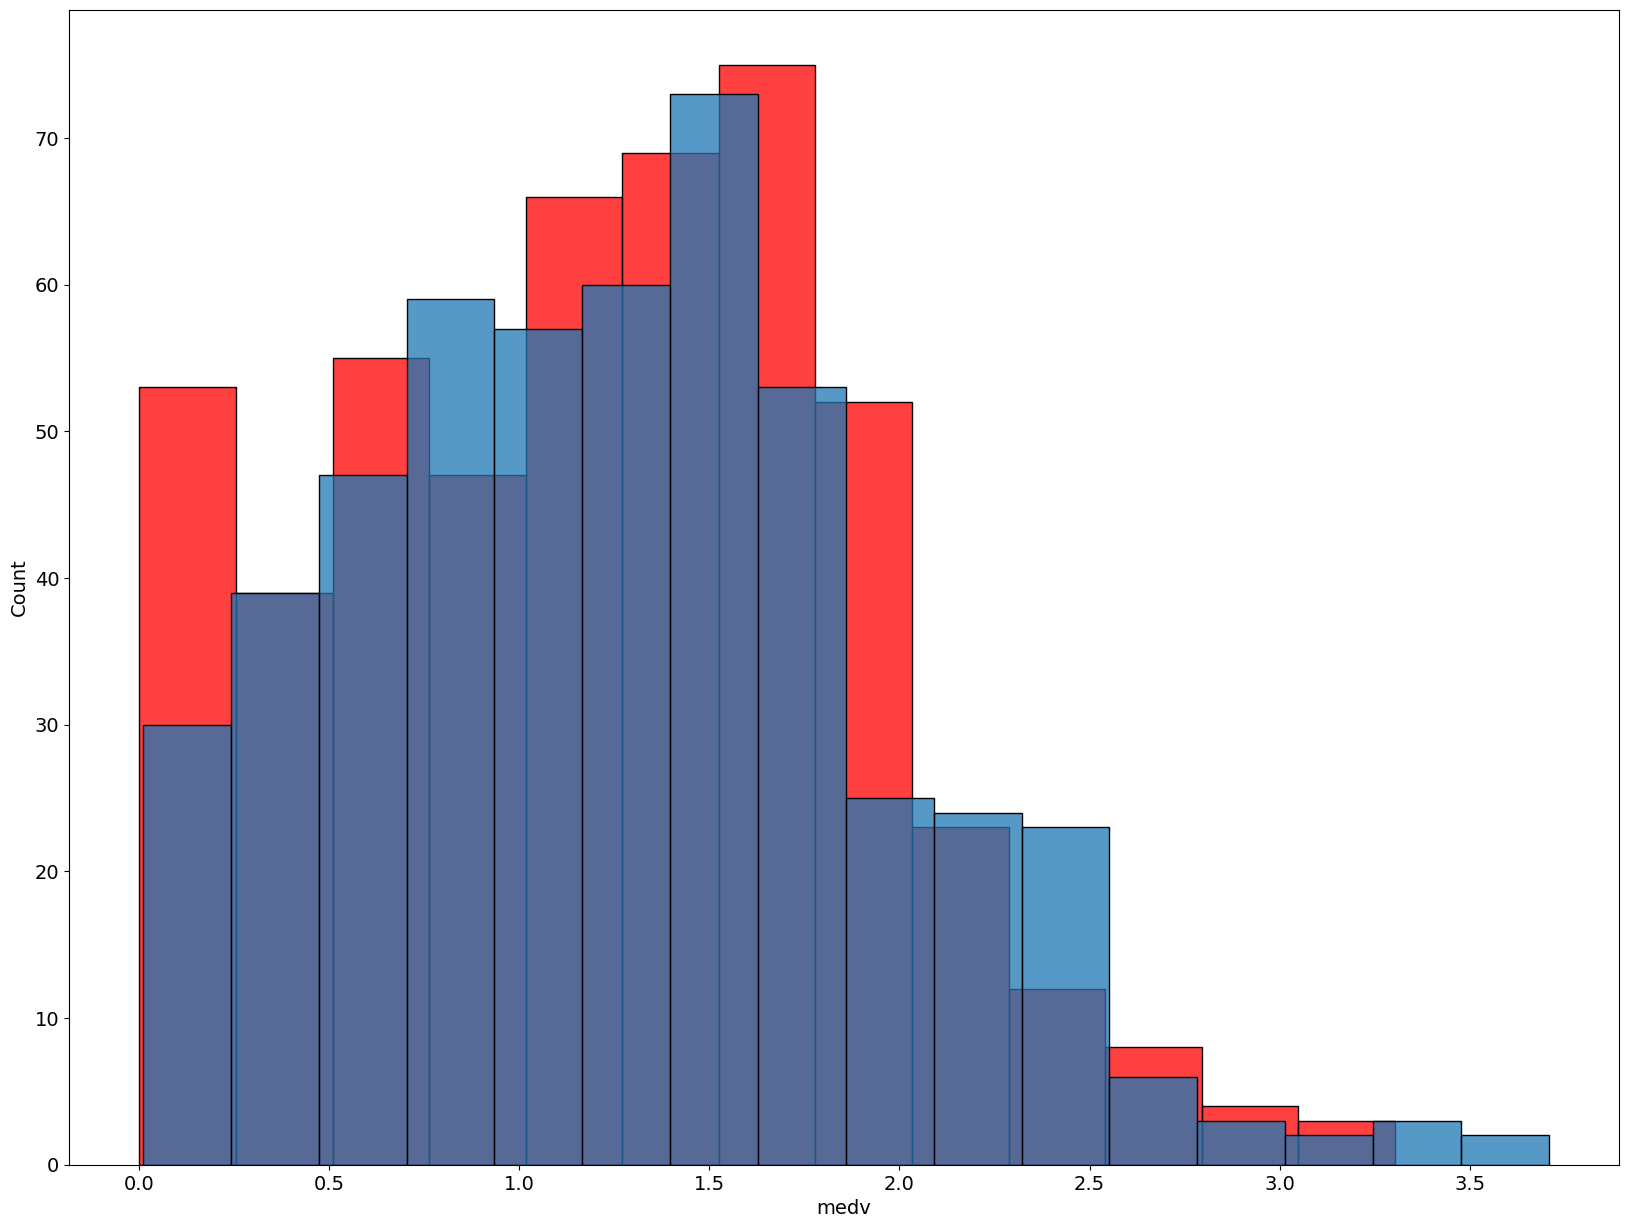

In [ ]:
sns.histplot(np.log1p(errors_full.abs()), color="red")
sns.histplot(np.log1p(errors_updated.abs()))

In [ ]:
mannwhitneyu(errors_full.abs(), errors_updated.abs(), alternative="less")

MannwhitneyuResult(statistic=125669.0, pvalue=0.30672445919099073)

In [ ]:
errors_full.abs().mean(), errors_updated.abs().mean()

(3.270862810900316, 3.5645595123260043)

Вообще получается, что модель у нас что с выкинутым предиктором, что нет, не отличается значимо. тем более у нас везде виф не больше 10, вроде как для не-биологических данных такое используют
